## 1. Getting the data ready
Data doesn't always come ready to use with a Scikit-Learn machine learning model.

Three of the main steps you'll often have to take are:

* Splitting the data into features (usually X) and labels (usually y)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also call feature encoding)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
car_sales = pd.read_csv("../../data/data_cleaning/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
len(car_sales)

1000

In [4]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### 1.1 Make sure it's all numerical
We want to turn the "Make" and "Colour" columns into numbers.

In [5]:
from sklearn.model_selection import train_test_split

# Split into X & y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# Train on the data so as to learn patterns from the data
# model.fit(X_train, y_train)
# model.score(X_test, y_train)

In [7]:
# Turn the categories into numbers
# OneHotEncoding - A process used to turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Going to except a list of tupples with a name 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

# The version of our X data
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [8]:
# We have encoded the different parameters of each samples(Make, color, Doors) into 0 & 1
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [9]:
# Another way... using pandas and pd.get_dummies()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [11]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [12]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size = 0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
Many machine learning models don't work well when there are missing values in the data.

There are two main options when dealing with missing values.

1. Fill them with some given value: For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of filling missing values is often referred to as imputation.
2. Remove them: If a row has missing values, you may opt to remove them completely from your sample completely. However, this potentially results in using less data to build your model.

<strong>Note:</strong> Dealing with missing values is a problem to problem issue. And there's often no best way to do it.

In [14]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../../data/data_cleaning/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [15]:
# Check the total missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
# Create W & V
W = car_sales_missing.drop("Price", axis=1)
v = car_sales_missing["Price"]

In [17]:
# Let's try and convert our data to numbers

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

transformed_W = transformer.fit_transform(W)
transformed_W

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [18]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

In [19]:
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace= True)

In [20]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),
                                            inplace=True)

In [21]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [22]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [24]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
len(car_sales_missing)

950

In [26]:
# Create W & V
W = car_sales_missing.drop("Price", axis=1)
v = car_sales_missing["Price"]

In [27]:
#Trying this again

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

transformed_W = transformer.fit_transform(car_sales_missing)
transformed_W

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [28]:
car_sales_missing_2 = pd.read_csv('../../data/data_cleaning/car-sales-extended-missing-data.csv')
car_sales_missing_2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
car_sales_missing_2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
# Get the car_sales missing dataframe, drop d nan that are in d subsets of the price column
# Drop the rows with no labels
car_sales_missing_2.dropna(subset=["Price"], inplace=True)
car_sales_missing_2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [31]:
# Split into X & y
X = car_sales_missing_2.drop('Price', axis=1)
y = car_sales_missing_2['Price']

In [32]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [33]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
numerical_imputer = SimpleImputer(strategy="mean")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Define columns
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_features = ["Odometer (KM)"]

# Create an imputer(something that fills missing data)
imputer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, categorical_features),
    ("numerical_imputer", numerical_imputer, numerical_features),
    ("door_imputer", door_imputer, door_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [34]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [35]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [36]:
# Turn the categories into numbers
# OneHotEncoding - A process used to turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Going to except a list of tupples with a name 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

# The version of our X data
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [37]:
# Now we've got our data as numbers and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.044955128011236356

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for ML model/algorithm.

* Classification - Predicting whether a sample is one thing or another
* Regression - Predicting a number

Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a ML model for Regression problem

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()

In [39]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
# How many samples?
len(boston_df)

506

### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [41]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random sed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

In [42]:
# Improving the score
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random sed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Check the score of the Random Forest Regressor model on test data
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem

In [43]:
heart_disease = pd.read_csv("../../data/Matplotlib/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
len(heart_disease)

303

After consulting the scikilearn estimator map, it says we should try `LinearSVC`.

In [45]:
# Check the scikilearn estimator map we will be using Linear SVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
lsvc = LinearSVC(max_iter=10000)
lsvc.fit(X_train,y_train)

# Evaluate the LinearSVC
lsvc.score(X_test, y_test)

C:\Users\oabas\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [46]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [47]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

 Tidbit:
 
        1. If you have structure data, use ensemble methods
        2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model into the data

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [48]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data (training the ML model)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier (Use the patterns the models have learn)
clf.score(X_test, y_test)

0.8524590163934426

In [49]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [50]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make Predictions using a ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [51]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [54]:
clf.score(X_test, y_test)

0.8524590163934426

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [56]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5]) 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [57]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [58]:
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [59]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [60]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [61]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a ML model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

In [62]:
np.random.seed(42)

# Create the dataset
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### 4.1 Evaluating a model with the `score` method

In [63]:
clf.score(X_train, y_train)

1.0

In [64]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [65]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the dataset
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [70]:
np.random.seed(50)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8281967213114754)

In [71]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.8852459 , 0.80327869, 0.81666667, 0.78333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1.Accuracy**

In [72]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [73]:
np.mean(cross_val_score)

0.8248087431693989

In [74]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**2. Area under ROC curve**

* Area under curve (AUC)
* Receiver operating characteristics curve (ROC) - They are comparison of a model's true positive rate (TPR) versus a models false positive rate (FPR)

* TPR = model predicts 1 when truth is 1
* FPR = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [75]:
# Create X_test.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [77]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [78]:
# Calculate FPR, TPR and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Chck the FPR
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

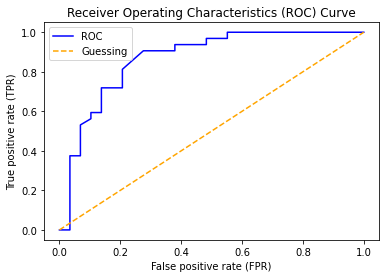

In [79]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.plot(fpr, tpr, color="blue", label="ROC")
    
    # Plot line with no predictive power(baseline)
    plt.plot([0, 1], [0, 1], color="orange", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**3. Confusion Matrix**

It's a quick way to compare the labels a model predicts and the actual labels it was suppose to predict. 

In essence, giving you an idea of where the model is getting confused.

In [81]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [84]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [86]:
23+6+6+26, len(X_test)

(61, 61)

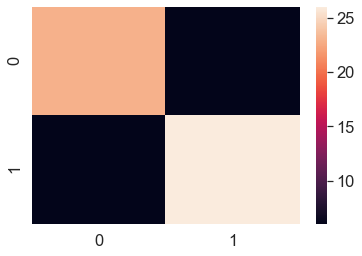

In [88]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

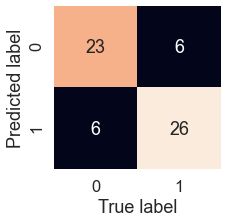

In [91]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(conf_mat);

**4. Classification report**

1. `Precision` - Indicates the proportion of positive identifications(model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0
2. `Recall` - Indicates the proportion of actual positives which were correctly classified.
3. `F1 score` - A combination of precision and recall.
4. `Support` - The number of samples each metric was calculated on.
5. `Accuracy` - THe accuracy of the model in decimal form.
6. `Macro Avg` - The average precision, recall and F1 score btw classes. It doesn't class imbalance into effect, so if you do have class imbalances pay attention to this metrics
7. `Weighted avg` - The weighted average, precision, recall and F1 score btw classes. Weighted means each metric is calculated with respect to how man samples there are in each class.

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [94]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True))

C:\Users\oabas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oabas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oabas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What **R-squared** does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [98]:
model.score(X_test, y_test)

0.8654448653350507

In [99]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [100]:
y_test.mean()

21.488235294117654

In [101]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [102]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [103]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [104]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
76,20.0,21.644,1.644
316,17.8,19.113,1.313
140,14.0,15.334,1.334
471,19.6,21.140,1.540
500,16.8,20.639,3.839


In [105]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

2.136382352941176

**Mean squared error**

In [106]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [107]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
173,23.6,23.081,-0.519,0.269361
274,32.4,30.574,-1.826,3.334276
491,13.6,16.759,3.159,9.979281
72,22.8,23.460,0.660,0.435600
452,16.1,16.893,0.793,0.628849


In [108]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

In [109]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

<ipython-input-109-09f6a99b518f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample


In [110]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
173,23.6,23.081,-0.519,0.269361
274,32.4,30.574,-1.826,3.334276
491,13.6,16.759,3.159,9.979281
72,22.8,23.460,0.660,0.435600
452,16.1,16.893,0.793,0.628849


In [111]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

9.867437068627439

In [112]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
173,23.6,23.081,-0.519,0.269361
274,32.4,30.574,-1.826,20.000000
491,13.6,16.759,3.159,20.000000
72,22.8,23.460,0.660,20.000000
452,16.1,16.893,0.793,20.000000
...,...,...,...,...
412,17.9,13.159,-4.741,20.000000
436,9.6,12.476,2.876,20.000000
411,17.2,13.612,-3.588,20.000000
86,22.5,20.205,-2.295,5.267025


In [113]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

19.52402950980392

### 4.2.3 Finally using the `scoring` parameter

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [115]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [116]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [117]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [118]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [119]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [120]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [130]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.82182445, 0.56120208, 0.27701682])

In [131]:
np.mean(cv_r2)

0.5533477845702309

In [132]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -8.23391807, -12.67014746, -21.94096068, -46.60992656,
       -19.66264203])

In [133]:
np.mean(cv_mse)

-21.823518960260124

In [134]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13741176, -2.64642574, -3.27714851, -3.80712871, -3.28570297])

In [135]:
np.mean(cv_mae)

-3.030763541059988

### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**Classification evaluation functions**

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [144]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(45)

# Create X & y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.9067259487804298
MAE: 2.3768921568627457
MSE: 10.080870558823534


## 5. Improving a Model

First predictions = baseline predictions. 
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [145]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test.

In [146]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [147]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [148]:
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Splot into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics 

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [149]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [156]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=50, # no of models to try
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samp

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.2s
[CV] END max_depth=None,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [157]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [158]:
# Make predictions with the best hyperparameter
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


### 5.3 Hyperparameter tuning with GridSearchCV

In [159]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [164]:
# We need to reduce the grid parameter cause for  gridsearchcv it multiplies all 
# the parameter element and use it for no of iteration
grid_2 = {'n_estimators': [100, 200, 500, 1000],
          'max_depth': [None, 10, 20],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

# 4*3*2*2*2 = 96 = no of iteration we wld use for gridsearchcv

In [165]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=20, max_features=s

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.6s


In [166]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [167]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


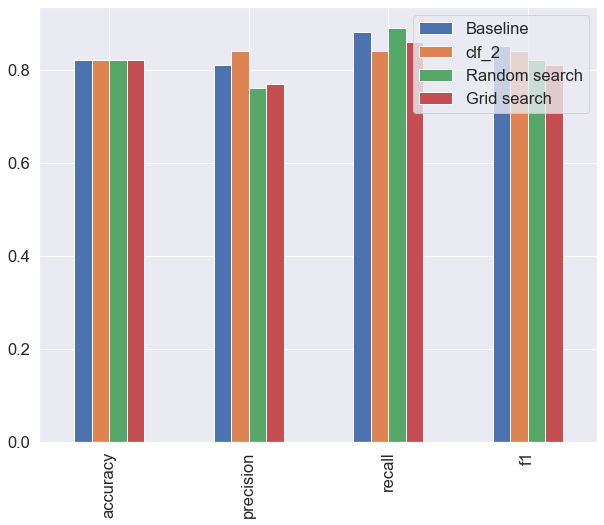

In [169]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "Random search": rs_metrics,
                                "Grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

https://docs.python.org/3/library/pickle.html

In [170]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("Gridsearch_random_forest_model_1.pkl", "wb"))

In [171]:
# Load a saved model
loaded_pickle_model = pickle.load(open("Gridsearch_random_forest_model_1.pkl", "rb"))

In [172]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [173]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="GS_random_forest_model_1.joblib")

['GS_random_forest_model_1.joblib']

In [174]:
# Import a saved joblib model
loaded_joblib_model = load(filename="GS_random_forest_model_1.joblib")

In [175]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}